In [9]:
import pandas
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. pre-process

### 1-1 load data

In [31]:
# load data set
train = pandas.read_csv("./data/train.csv")
test  = pandas.read_csv("./data/test.csv")

In [11]:
train.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
test.tail() # no 'TARGET'

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75817,151837,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


### 1-2 data summary

In [32]:
# component of data
data = len(train) # total number of train datas

features = train.shape[1]-2 # number of features (exclude first column(ID) and last column(TARGET))

sat_c = len(train[train['TARGET'] == 0]) # number of satisfied customers

unsat_c = len(train[train['TARGET'] == 1]) # number of unsatisfied customers

sat_rate = 100 * unsat_c/sat_c # percent of unsatisfied customers

print '[Train data set]'
print ('total number of datas: {}'.format(data))
print ('number of features: {}'.format(features))
print ('number of satisfied customers: {}'.format(sat_c))
print ('number of unsatisfied customers: {}'.format(unsat_c))
print ('percent of unsatisfied customers: {:.2f}%'.format(sat_rate))
# ---------------------------------------------------------------------

data = len(test) # total number of test datas

features = test.shape[1]-1 # number of features (exclude first column(ID))
print
print '[test data set]'
print ('total number of datas: {}'.format(data))
print ('number of features: {}'.format(features))

[Train data set]
total number of datas: 76020
number of features: 369
number of satisfied customers: 73012
number of unsatisfied customers: 3008
percent of unsatisfied customers: 4.00%

[test data set]
total number of datas: 75818
number of features: 369


### 1-3 delete constant columns

In [33]:
# remove constant columns
con_removed = [] # removed constant columns
df_train = train # copy the train data set
df_test = test # copy the test data set

# removed constant columns
for col in df_train.columns:
    if df_train[col].std() == 0:
        con_removed.append(col)

df_train.drop(con_removed, axis=1, inplace=True) # remove constant columns in the train data set

df_test.drop(con_removed, axis=1, inplace=True) # remove constant columns in the test data set

print ('removed constand columns: {}'.format(len(con_removed)))
print
print con_removed

removed constand columns: 34

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


### 1-4 remove duplicate columns

In [41]:
# remove duplicated columns
dup_removed = [] # removed duplicated columns
col_tmp = [] # temp list for columns scan
dupList = {} # a dictionary of duplicated columns

columns = df_train.columns
for i in range(len(columns)-1):
    v = df_train[columns[i]].values
    dupCols = [] # duplicated columns
    for n in range(i+1, len(columns)): # compare with i and i+1(equal?) 
        if np.array_equal(v, df_train[columns[n]].values):
            dup_removed.append(columns[n])
            if columns[n] not in col_tmp:
                dupCols.append(columns[n])
                dupList[columns[i]] = dupCols
                
print dupList
print
print ('duplicated columns with distinct values: {}'.format(len(dupList)))

df_train.drop(dup_removed, axis=1, inplace=True)
df_test.drop(dup_removed, axis=1, inplace=True)
print
print ('removed duplicated coulumns: {}'.format(len(dup_removed)))

{'delta_imp_reemb_var33_1y3': ['delta_num_reemb_var33_1y3'], 'ind_var18_0': ['ind_var18'], 'delta_imp_reemb_var13_1y3': ['delta_num_reemb_var13_1y3'], 'ind_var26_0': ['ind_var26'], 'ind_var25_0': ['ind_var25'], 'num_var6_0': ['num_var29_0'], 'num_var26_0': ['num_var26'], 'ind_var40': ['ind_var39'], 'ind_var37_0': ['ind_var37'], 'num_var18_0': ['num_var18'], 'delta_imp_trasp_var33_in_1y3': ['delta_num_trasp_var33_in_1y3'], 'saldo_var13_medio': ['saldo_medio_var13_medio_ult1'], 'num_var40': ['num_var39'], 'num_var34_0': ['num_var34'], 'num_var32_0': ['num_var32'], 'ind_var13_medio_0': ['ind_var13_medio'], 'num_var6': ['num_var29'], 'num_var13_medio_0': ['num_var13_medio'], 'ind_var32_0': ['ind_var32'], 'delta_imp_reemb_var17_1y3': ['delta_num_reemb_var17_1y3'], 'delta_imp_trasp_var17_in_1y3': ['delta_num_trasp_var17_in_1y3'], 'saldo_var6': ['saldo_var29'], 'ind_var34_0': ['ind_var34'], 'num_var37_0': ['num_var37'], 'num_var25_0': ['num_var25'], 'ind_var6_0': ['ind_var29_0'], 'delta_imp_t

In [42]:
print dup_removed

['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


In [8]:
# remove duplicate columns
colsToRemove = [] # columns to remove
colsScaned = [] # columns scaned
dupList = {} # a dictionary of dupicate columns with distinct values
# the keys are the first column of the dupicated columns
# the entries are columns which has the same value as the key 
columns = df_train.columns
for i in range(len(columns)-1):
    # search through every column
    v = df_train[columns[i]].values
    dupCols = [] # dumpicated columns
    for j in range(i+1,len(columns)):
    # compare if the two column are equal
        if np.array_equal(v,df_train[columns[j]].values):  
        # if yes add to the columns to be removed
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
            # only add new entry if the column haven't be scaned before
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j]) # add the column as scaned
                dupList[columns[i]] = dupCols # update the key in the dictionary

# print the dupicated columns as a dictionary
# the keys are distinct dupicated columns
# the entries are columns which has the same value as the key 
print(dupList)
print("# duplicated columns with distinct values: {}".format(len(dupList)))  

df_train.drop(colsToRemove, axis=1, inplace=True) 
# remove duplicate columns in the training set
df_test.drop(colsToRemove, axis=1, inplace=True) 
# remove duplicate columns in the test set
print("# removed duplicated columns: {}".format(len(colsToRemove)))  
#print("Train set size: {}".format(df_train.shape))
#print("Test set size: {}".format(df_test.shape))

{'delta_imp_reemb_var33_1y3': ['delta_num_reemb_var33_1y3'], 'ind_var18_0': ['ind_var18'], 'delta_imp_reemb_var13_1y3': ['delta_num_reemb_var13_1y3'], 'ind_var26_0': ['ind_var26'], 'ind_var25_0': ['ind_var25'], 'num_var6_0': ['num_var29_0'], 'num_var26_0': ['num_var26'], 'ind_var40': ['ind_var39'], 'ind_var37_0': ['ind_var37'], 'num_var18_0': ['num_var18'], 'delta_imp_trasp_var33_in_1y3': ['delta_num_trasp_var33_in_1y3'], 'saldo_var13_medio': ['saldo_medio_var13_medio_ult1'], 'num_var40': ['num_var39'], 'num_var34_0': ['num_var34'], 'num_var32_0': ['num_var32'], 'ind_var13_medio_0': ['ind_var13_medio'], 'num_var6': ['num_var29'], 'num_var13_medio_0': ['num_var13_medio'], 'ind_var32_0': ['ind_var32'], 'delta_imp_reemb_var17_1y3': ['delta_num_reemb_var17_1y3'], 'delta_imp_trasp_var17_in_1y3': ['delta_num_trasp_var17_in_1y3'], 'saldo_var6': ['saldo_var29'], 'ind_var34_0': ['ind_var34'], 'num_var37_0': ['num_var37'], 'num_var25_0': ['num_var25'], 'ind_var6_0': ['ind_var29_0'], 'delta_imp_t

In [9]:
print(colsToRemove) # print Duplicate columns

['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


## 1.5 Make Train and Test Set

In [43]:
# make train data set
x_train = df_train.drop(['ID', 'TARGET'], axis=1)
y_train = df_train['TARGET']

# make test data set
id_test = df_test['ID']
x_test = df_test.drop(['ID'], axis=1)

print ('Train data set size: {}'.format(x_train.shape))
print ('Test data set size: {}'.format(x_test.shape))

Train data set size: (76020, 306)
Test data set size: (75818, 306)


## 2. Data Analysis

### 2.1 log

## 2.1 PCA

In [ ]:
plt.scatter

In [11]:
# rescale the data for PCA
scaler = preprocessing.MinMaxScaler() # max min scaling
X_train_normalized = scaler.fit_transform(X_train)
print("Train set size: {}".format(X_train_normalized.shape))

Train set size: (76020L, 306L)


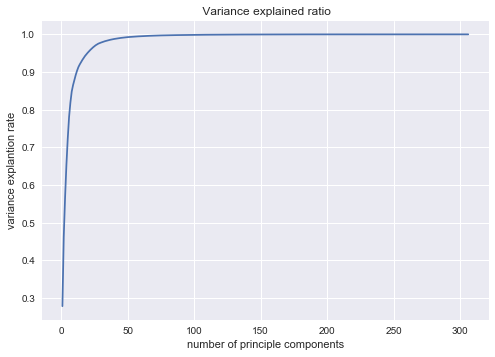

In [12]:
# PCA
# n_components equal # feature
pca = PCA(n_components=X_train_normalized.shape[1]) 
pca.fit(X_train_normalized)
np.set_printoptions(precision=2, suppress=True) # set printing format
# plot variance explained ratio
plt.plot(range(1,307),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principle components')
plt.ylabel('variance explantion rate')
plt.title(" Variance explained ratio")
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

# Print the components and the amount of variance in the data
# contained in each dimension
# print ("Principle components:")
# print (pca.components_)

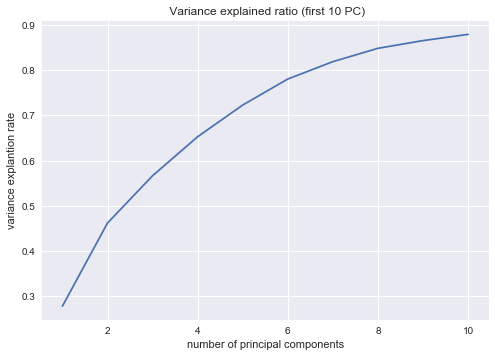

In [13]:
# Plot variance explantion rate of first 10 PCs
plt.plot(range(1,11),np.cumsum(pca.explained_variance_ratio_[:10]))
plt.xlabel('number of principal components')
plt.ylabel('variance explantion rate')
plt.title(" Variance explained ratio (first 10 PC)")
plt.show()

In [14]:
# Project on 2 PCs
pca_2d = PCA(n_components = 2) # 2 principle components
pca_2d.fit(X_train_normalized)
# reduce the dataset to 2 pcs
reduced_data = pca_2d.fit_transform(X_train_normalized) 
#np.set_printoptions(precision=0, suppress=True)
#print (reduced_data[:10])  # print upto 10 elements

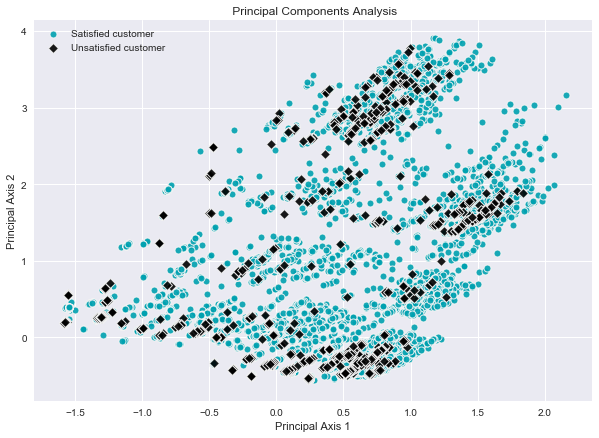

In [15]:
# Visualization PCA in 2D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
classes = [0,1]
labels = ["Satisfied customer", "Unsatisfied customer"]
markers = ["o", "D"]
for class_ix, marker, color, label in zip(classes, markers, colors, labels):
    ax.scatter(reduced_data[np.where(y_train == class_ix), 0],
               reduced_data[np.where(y_train == class_ix), 1],
               marker=marker, color=color, edgecolor='whitesmoke',
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title(" Principal Components Analysis")
plt.xlabel("Principal Axis 1")
plt.ylabel("Principal Axis 2")
plt.show()

In [16]:

# Define scoring function (performance metrics)
def score_model(clf):
    print ("\nClassifier: {}...".format(clf.__class__.__name__))
    start = time.time()
    # use 3-fold CV
    scores = cross_validation.cross_val_score(clf, X_train, y_train,
                                              scoring='roc_auc', cv=3) 
    end = time.time()
    print ("time (secs): {:.3f}".format(end - start))
    print ("roc_auc: {:.3f}".format(scores.mean()))
    return scores.mean()

In [15]:
# Compare different algrithem
scores = {}
# Decision Tree
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 
# naive bayes
scores['gaussian'] = score_model(naive_bayes.GaussianNB())
# logistic regression
scores['logistic_regression'] = score_model(linear_model.LogisticRegression()) 

# ensemble methors
# AdaBoost
scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier()) 
# Random Forest
scores['random_forest'] = score_model(ensemble.RandomForestClassifier()) 
# bagging
scores['bagging'] = score_model(ensemble.BaggingClassifier()) 
# gradient boosting
scores['gradient_boosting'] = score_model(ensemble.GradientBoostingClassifier())


Classifier: DecisionTreeClassifier...
time (secs): 8.961
roc_auc: 0.570

Classifier: GaussianNB...
time (secs): 2.324
roc_auc: 0.515

Classifier: LogisticRegression...
time (secs): 19.338
roc_auc: 0.604

Classifier: AdaBoostClassifier...
time (secs): 21.879
roc_auc: 0.826

Classifier: RandomForestClassifier...
time (secs): 5.539
roc_auc: 0.680

Classifier: BaggingClassifier...
time (secs): 52.885
roc_auc: 0.697

Classifier: GradientBoostingClassifier...
time (secs): 100.205
roc_auc: 0.833


In [17]:
# Use GradientBoosting to find feature importance
clf = ensemble.GradientBoostingClassifier(random_state = 42) # define classifier
clf.fit(X_train, y_train) # fit trainig data
print(clf)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)


In [18]:

# list feature importance
importances = clf.feature_importances_ 
# get feature importance from the classifier
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
## the list is very long, so comment it out
#colsToSelect = []
#for f in range(X_train.shape[1]):
#    print("%d. feature %d %s (%f)" % (f + 1, indices[f], 
#                                      X_train.columns[indices[f]], 
#                                      importances[indices[f]]))

Feature ranking:


In [19]:

# visualizate the most important 100 features
feat_imp = pandas.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(inplace=True,ascending =False )
# plot the importance of the first 100 features
ax =feat_imp.head(100).plot(kind='barh', figsize=(10,20), align='center',
                           title='Feature Importance')
ax.invert_yaxis()

In [20]:
# visualizate the most important 10 features
feat_imp = pandas.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(inplace=True,ascending =False )
#print(feat_imp.head(10))
ax =feat_imp.head(10).plot(kind='barh', figsize=(10,5), align='center',
                           title='Feature importance')
ax.invert_yaxis()

In [21]:

# select the first 92 most important features.
colsToSelect = []
for f in range(0,92):
    colsToSelect.append(X_train.columns[indices[f]])
print ("number of feature selected: {:.0f}".format(len(colsToSelect)))

number of feature selected: 92


In [22]:

# select feature in new data set
y_train2 = df_train['TARGET'] # data label
X_train2 = df_train[colsToSelect] # new training set
X_test2 = df_test[colsToSelect] # new test set
print("Train set size: {}".format(X_train2.shape))
print("Test set size: {}".format(X_test2.shape))

Train set size: (76020, 92)
Test set size: (75818, 92)


In [23]:
# select the first 5 most important features to visualize
cols2see = []
for f in range(0,5):
    cols2see.append(X_train.columns[indices[f]])
cols2see.append('TARGET') # make another one with 'TARGET'
data2see = df_train[cols2see]

In [24]:
# print the 5 variable to investigate
print(cols2see)

['saldo_var30', 'var15', 'var38', 'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'TARGET']


In [25]:

# pair plot the 5 variables
g =sns.pairplot(df_train[['saldo_var30', 'var15', 'var38',
                          'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3',
                          'TARGET']],
             hue="TARGET", size=2, diag_kind="kde")
g.fig.suptitle('Pairplot of the 5 most important features',fontsize=16)

LinAlgError: singular matrix

In [26]:
# Plot the correlation of the 5 most important features
# select the first 5 most important features to visualize
cols2see = []
for f in range(0,5):
    cols2see.append(X_train.columns[indices[f]])
data2see = df_train[cols2see]
ax = plt.axes()
sns.corrplot(data2see,ax = ax)
ax.set_title('Corelation plot of the 5 most important features',fontsize=16)
plt.show()

AttributeError: 'module' object has no attribute 'corrplot'